In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
from scipy import integrate as integrate
import sympy as sp
x, w, z = sp.symbols('x, w, z')

In [2]:
swift_data = pd.read_csv('swift_data.csv', sep='\t')
z_min = swift_data['z'].min()

In [3]:
def z_min_z(z_min):
    """
    zmin(z) is obtained on solving tage(z) − tage(zmin) = τmin
    """
    return (cosmo.age(0) - cosmo.age(z_min)).value

In [4]:
# this generates a list from of (z+1) from 0<z<10, or 1<Z<11
Z_lst = np.linspace(1, 11, 5)
t_lst = []
for Z in Z_lst:
    t_lst.append(z_min_z(Z))

In [80]:
st_d = np.linspace(0, 2, 5)
t_d = np.linspace(1, 5, 5)
td, std = np.meshgrid(t_d, st_d)

In [6]:
t = (1/(w*sp.sqrt(0.3*(w)**3 + 0.7)))
f = sp.integrate(t)
f # we will use this j in our later calculations

-0.796819072889596*asinh(1.52752523165195/w**(3/2))

In [7]:
#exp[−(ln F−ln t_d)^2/2σ^2]/(√(2π)σ).
def td_func(x, t_d, st_d):
    return np.exp((np.log(0.7968*np.arcsinh(1.5275/(x**1.5)))-np.log(t_d))**2/2*st_d**2)/2.51*st_d 

In [19]:
def contour(Z):
    zl = []
    for s in range(len(st_d)):
        int_lst = []

        for t in range(len(t_d)):
            func = lambda x : (((x**2.7)/(1+(x/2.9)**(5.6)))*(1/(x*(0.3*(x)**3 + 0.7)**0.5)))*(td_func(Z, st_d[s], t_d[t])-td_func(x, st_d[s], t_d[t]))
            a, b = integrate.quad(func, z_min_z(Z), np.inf)
            int_lst.append(abs(a))
        zl.append(int_lst)
    plt.contour(t_d, st_d, zl)

In [77]:
def result_log(st_d, t_d):
    int_lst=[]
    for Z in Z_lst:
        func = lambda x : (((x**2.7)/(1+(x/2.9)**(5.6)))*(1/(x*(0.3*(x)**3 + 0.7)**0.5)))*(td_func(Z, st_d, t_d)-td_func(x, st_d, t_d))
        a, b = integrate.quad(func, Z, np.inf)
        int_lst.append(abs(a))

    plt.figure(figsize=(10,7)) #sets figure size
    plt.grid(b=True, which='major', alpha=0.8, linestyle='-', linewidth=2)
    plt.grid(b=True, which='minor', alpha=0.3, linestyle='dotted', linewidth=2)
    print('distribution for standard deviation ='+' ' + str(st_d) +' and time delay = '+ str(t_d))
    print(int_lst)
    plt.plot(np.log(Z_lst), -np.log(int_lst))

    plt.ylabel('log(psi)')
    plt.xlabel('log(Z)')
    plt.show


C:\Users\Hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """


distribution for standard deviation = 0.5 and time delay = 1
[896354.6155680418, 934923.6529411077, 974937.8113552332, 1016444.9923303127, 1059493.7254750729]


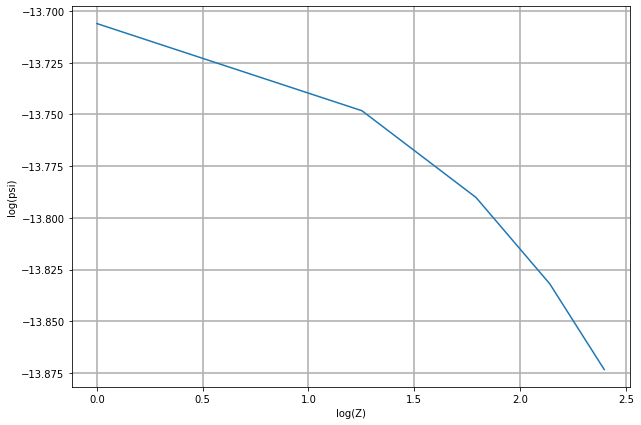

In [78]:
result_log(0.5, 1)

C:\Users\Hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:5: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  """


distribution for standard deviation = 1.5 and time delay = 1
[15488200645.226562, 16324602641.402344, 17200640066.140625, 18117976076.507812, 19078330753.546875]


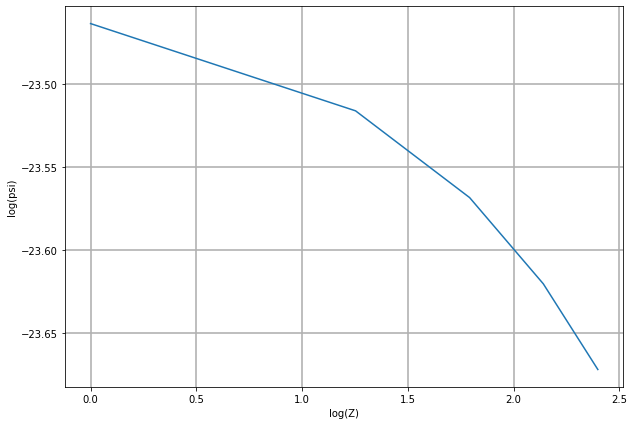

In [79]:
result_log(1.5, 1)